<a href="https://colab.research.google.com/github/amansandhu408/deep-learning/blob/main/Early_Stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import seaborn as sns

In [23]:
X, y = make_circles(n_samples = 100, noise= 0.1, random_state=1)

<Axes: >

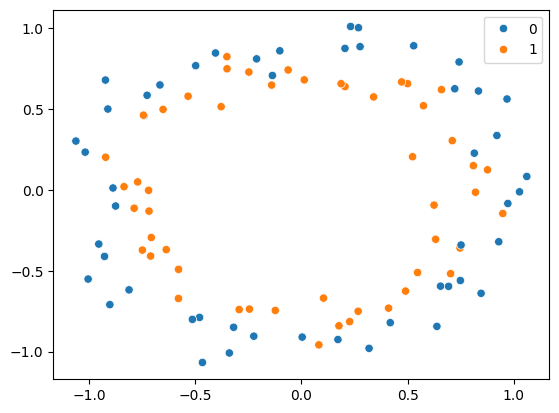

In [24]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [25]:
X_train, X_test , y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
model= Sequential()

model.add(Dense(256,activation='relu', input_dim=2))
model.add(Dense(1,activation= 'sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,verbose=0)

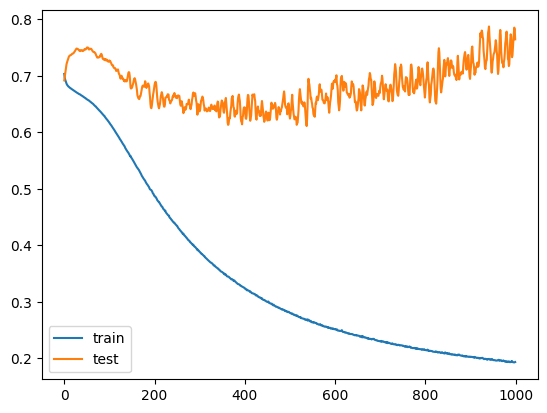

In [29]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


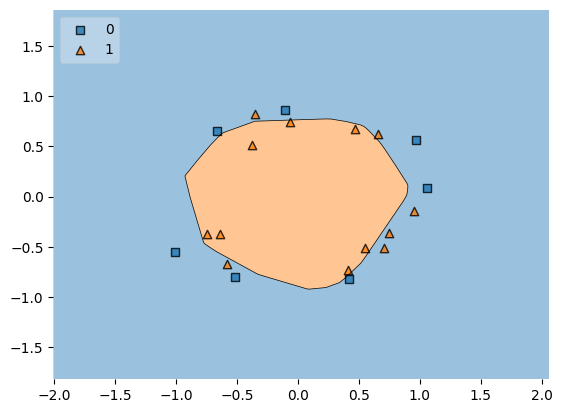

In [30]:
plot_decision_regions(X_test ,y_test.ravel(), clf= model,legend=2)
plt.show()

Early Stopping

In [32]:

model = Sequential()

model.add(Dense(256,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [33]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=50,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [40]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=1000, callbacks= callback)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5500 - loss: 0.6698 - val_accuracy: 0.3500 - val_loss: 0.7455
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5422 - loss: 0.6722 - val_accuracy: 0.3500 - val_loss: 0.7464
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5656 - loss: 0.6608 - val_accuracy: 0.3500 - val_loss: 0.7474
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5578 - loss: 0.6659 - val_accuracy: 0.3500 - val_loss: 0.7474
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5305 - loss: 0.6720 - val_accuracy: 0.3500 - val_loss: 0.7471
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5266 - loss: 0.6734 - val_accuracy: 0.3500 - val_loss: 0.7465
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5031 - loss: 0.6762 - val_accuracy: 0.3500 - val_loss: 0.7463
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5188 - loss: 0.6766 - val_accuracy: 0.3500 - v

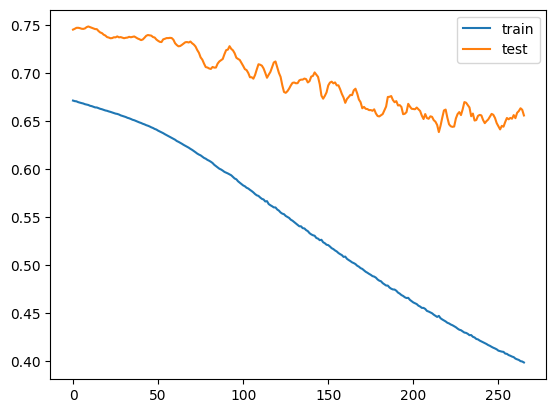

In [41]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


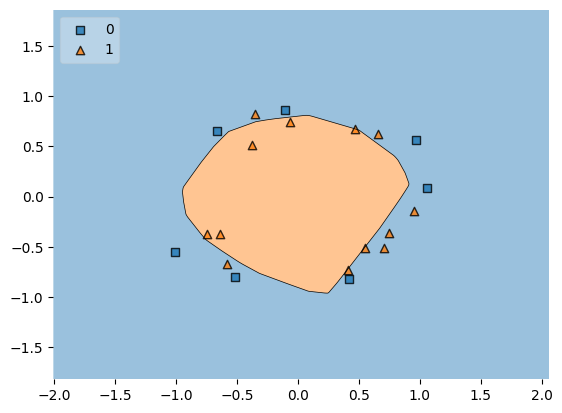

In [42]:
plot_decision_regions(X_test ,y_test.ravel(), clf= model,legend=2)
plt.show()